In [84]:
import re
import pandas as pd

In [85]:
f=open('WhatsApp Chat with Naila Navratri🔥 💐🎈🌹🔥\WhatsApp Chat with Naila Navratri🔥 💐🎈🌹🔥.txt', 'r', encoding='utf8')

In [86]:
data=f.read()

In [87]:
print(data)

11/10/2024, 7:06 pm - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
11/10/2024, 7:06 pm - ~ Abhash Varshney created group "Naila Navratri🔥 💐🎈🌹🔥"
11/10/2024, 7:06 pm - ~ Abhash Varshney added you
11/10/2024, 7:06 pm - Anjali Di Mahamaya: Acha
11/10/2024, 7:06 pm - Shalu Di Mahamaya: Are hum nhi gye h 😳😳
11/10/2024, 7:07 pm - Anjali Di Mahamaya: Ye group bna h naila k liye
11/10/2024, 7:07 pm - Anjali Di Mahamaya: Or hum ghar me baithe h
11/10/2024, 7:07 pm - Shalu Di Mahamaya: 🤣🤣🤣🤣
11/10/2024, 7:07 pm - Kusum: 🤣🤣🤣
11/10/2024, 7:07 pm - Shalu Di Mahamaya: Janbujh ke ye sab ho raha h
11/10/2024, 7:07 pm - +91 99269 15696: Light show chlega tb video call krta hu
11/10/2024, 7:07 pm - Kusum: group main video call karenge shyd
11/10/2024, 7:07 pm - Anjali Di Mahamaya: Acha acha
11/10/2024, 7:07 pm - Anjali Di Mahamaya: Khaogar to bhi kr lena fr
11/10/2024, 7:08 pm - +91 99269 15696: Dekhna 😍
11/10/2

In [88]:
pattern = r'\d{2}/\d{2}/\d{4},\s\d{1,2}:\d{2}\s?[apAP][mM]\s-\s'

In [89]:
messages=re.split(pattern, data)[1:]


In [90]:
dates=re.findall(pattern, data)


In [91]:
df=pd.DataFrame({ 'user_message':messages,'message_date':dates})
df['message_date']=pd.to_datetime(df['message_date'], format='%d/%m/%Y, %I:%M %p - ')
df.rename(columns={'message_date':'date'}, inplace=True)

df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2024-10-11 19:06:00
1,"~ Abhash Varshney created group ""Naila Navratr...",2024-10-11 19:06:00
2,~ Abhash Varshney added you\n,2024-10-11 19:06:00
3,Anjali Di Mahamaya: Acha\n,2024-10-11 19:06:00
4,Shalu Di Mahamaya: Are hum nhi gye h 😳😳\n,2024-10-11 19:06:00


In [92]:
df.shape

(243, 2)

In [93]:
users=[]
messages=[]
for message in df['user_message']:
    entry=re.split('([\w\W]+?):\s',message)
    if entry[1: ]:
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])
df['user']=users
df['message']=messages
df.drop(columns=['user_message'], inplace=True)

df.head()

,date,user,message
0,2024-10-11 19:06:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2024-10-11 19:06:00,group_notification,"~ Abhash Varshney created group ""Naila Navratr..."
2,2024-10-11 19:06:00,group_notification,~ Abhash Varshney added you\n
3,2024-10-11 19:06:00,Anjali Di Mahamaya,Acha\n
4,2024-10-11 19:06:00,Shalu Di Mahamaya,Are hum nhi gye h 😳😳\n


In [94]:
df['year']=df['date'].dt.year

In [95]:
df['month']=df['date'].dt.month_name()

In [96]:
df['day']=df['date'].dt.day

In [97]:
df['hour']=df['date'].dt.hour

In [98]:
df['minute']=df['date'].dt.minute

In [99]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2024-10-11 19:06:00,group_notification,Messages and calls are end-to-end encrypted. N...,2024,October,11,19,6
1,2024-10-11 19:06:00,group_notification,"~ Abhash Varshney created group ""Naila Navratr...",2024,October,11,19,6
2,2024-10-11 19:06:00,group_notification,~ Abhash Varshney added you\n,2024,October,11,19,6
3,2024-10-11 19:06:00,Anjali Di Mahamaya,Acha\n,2024,October,11,19,6
4,2024-10-11 19:06:00,Shalu Di Mahamaya,Are hum nhi gye h 😳😳\n,2024,October,11,19,6


In [100]:
df[df['user']=='Shalu Di Mahamaya'].shape

(29, 8)

In [101]:
words=[]
for message in df['message']:
    words.extend(message.split())

In [102]:
len(words)

682

In [103]:
import sys
print(sys.executable)


c:\Users\Asus\AppData\Local\Programs\Python\Python311\python.exe


In [104]:
from urlextract import URLExtract

extractor = URLExtract()
urls = extractor.find_urls("www.google.com is a great search engine")
print(urls)


['www.google.com']


In [105]:
links=[]
for message in df['message']:
    links.extend(extractor.find_urls(message))

In [106]:
print(len(links))

0


In [107]:
df

,date,user,message,year,month,day,hour,minute
0,2024-10-11 19:06:00,group_notification,Messages and calls are end-to-end encrypted. N...,2024,October,11,19,6
1,2024-10-11 19:06:00,group_notification,"~ Abhash Varshney created group ""Naila Navratr...",2024,October,11,19,6
2,2024-10-11 19:06:00,group_notification,~ Abhash Varshney added you\n,2024,October,11,19,6
3,2024-10-11 19:06:00,Anjali Di Mahamaya,Acha\n,2024,October,11,19,6
4,2024-10-11 19:06:00,Shalu Di Mahamaya,Are hum nhi gye h 😳😳\n,2024,October,11,19,6
...,...,...,...,...,...,...,...,...
238,2024-12-16 17:38:00,+91 91096 63182,<Media omitted>\n,2024,December,16,17,38
239,2024-12-16 17:38:00,+91 91096 63182,<Media omitted>\n,2024,December,16,17,38
240,2024-12-16 17:38:00,+91 91096 63182,<Media omitted>\n,2024,December,16,17,38
241,2024-12-16 17:38:00,+91 91096 63182,<Media omitted>\n,2024,December,16,17,38


In [108]:
x=df['user'].value_counts().head()

In [109]:
import matplotlib.pyplot as plt

In [110]:
def most_busy_users(df):
    if 'user' in df.columns:
        user_counts = df['user'].value_counts()
        return user_counts
    else:
        return None


([0, 1, 2, 3, 4],
 [Text(0, 0, '+91 91096 63182'),
  Text(1, 0, 'Happy Bahiya'),
  Text(2, 0, '+91 91743 47310'),
  Text(3, 0, 'Shalu Di Mahamaya'),
  Text(4, 0, 'Monika Di Mahamaya')])

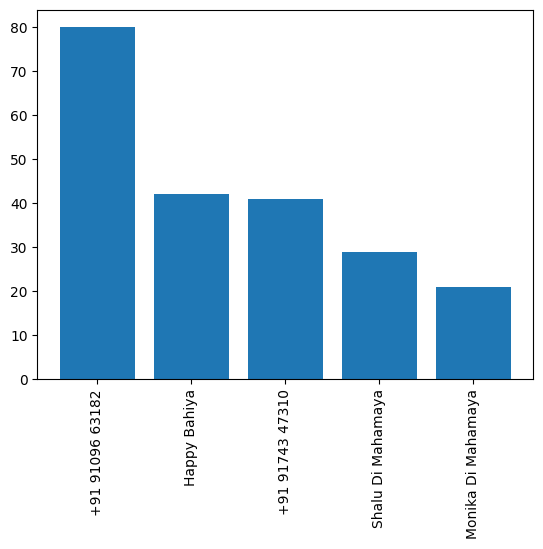

In [81]:
name=x.index
count=x.values
plt.bar(name,count)
plt.xticks(rotation="vertical" )